# RLC Synusoidal Circuit

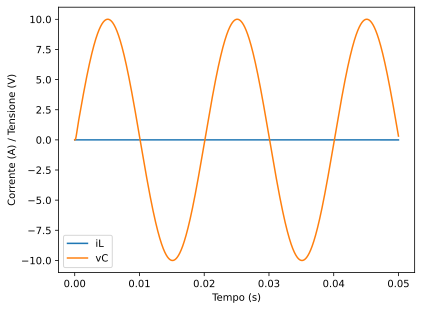

In [6]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import schemdraw as schem
import schemdraw.elements as e

# Definizione dei parametri del circuito
R = 100
L = 10e-3
C = 1e-6
Vin = lambda t: 10 * np.sin(2 * np.pi * 50 * t)

# Definizione delle equazioni del circuito
def circuit_equations(x, t):
    iL, vC = x
    didt = (Vin(t) - R * iL - vC) / L
    dvcdt = iL / C
    return [didt, dvcdt]

# Definizione dei tempi di integrazione
t_start = 0
t_stop = 0.05
t_step = 1e-6
t = np.arange(t_start, t_stop, t_step)

# Calcolo della soluzione dell'equazione differenziale del circuito
x0 = [0, 0]
x = np.zeros((len(t), 2))
x[0] = x0
for i in range(1, len(t)):
    x[i] = odeint(circuit_equations, x[i-1], [t[i-1], t[i]])[1]

# Disegno del circuito
d = schem.Drawing(unit=1, fontsize=10)

V1 = d.add(e.SOURCE_V, label='Vin')
L1 = d.add(e.INDUCTOR, d='right', label='L')
R1 = d.add(e.RES, d='right', label='R')
C1 = d.add(e.CAP, d='down', botlabel='C')
d.add(e.LINE, to=V1.start)
d.add(e.LINE, to=L1.start)
d.add(e.LINE, to=R1.start)
d.add(e.LINE, to=C1.start)

d.add(e.DOT, xy=C1.end)
d.add(e.LINE, d='left', l=d.unit/2)
d.push()
d.add(e.GND)
d.pop()

# Plot del risultato
d.draw()
plt.plot(t, x[:, 0], label='iL')
plt.plot(t, x[:, 1], label='vC')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A) / Tensione (V)')
plt.show()


Il codice che hai mostrato risolve le equazioni differenziali di un circuito RLC serie alimentato da un'onda sinusoidale. In particolare, utilizza la libreria scipy.integrate per risolvere l'equazione differenziale del circuito, e quindi visualizza il risultato utilizzando la libreria matplotlib.

Il circuito viene anche disegnato utilizzando la libreria schemdraw, che permette di creare un disegno del circuito in modo chiaro e leggibile.

In sintesi, il codice calcola e visualizza la risposta di un circuito RLC serie ad una tensione sinusoidale.